In [3]:
# The code was removed by Watson Studio for sharing.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [7]:
print(df_1.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [26]:
print(df_1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

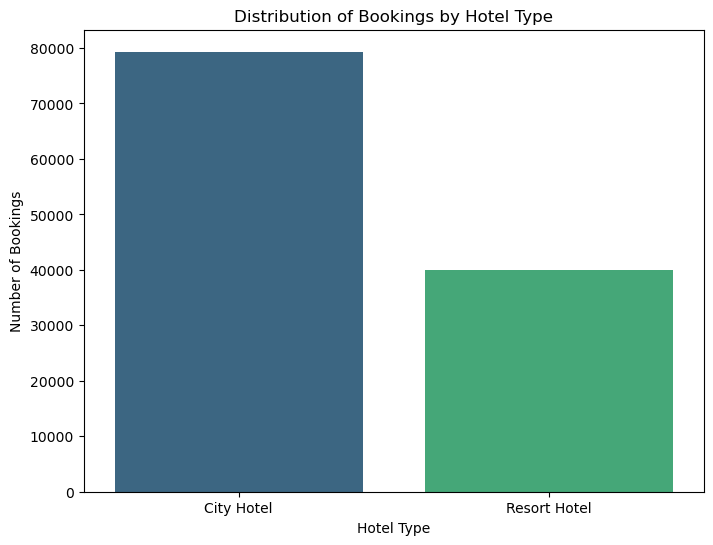

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of bookings by hotel type
hotel_counts = df['hotel'].value_counts()

# Plotting the distribution of hotel types
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_counts.index, y=hotel_counts.values, palette='viridis')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Bookings by Hotel Type')
plt.show()


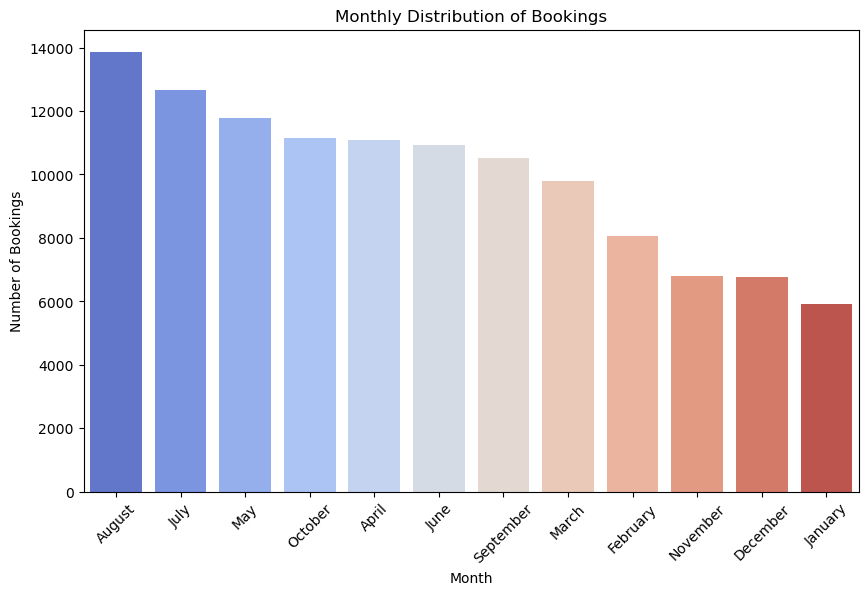

In [10]:
# Count the number of bookings by month
monthly_counts = df['arrival_date_month'].value_counts()

# Plotting the monthly distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Distribution of Bookings')
plt.xticks(rotation=45)
plt.show()


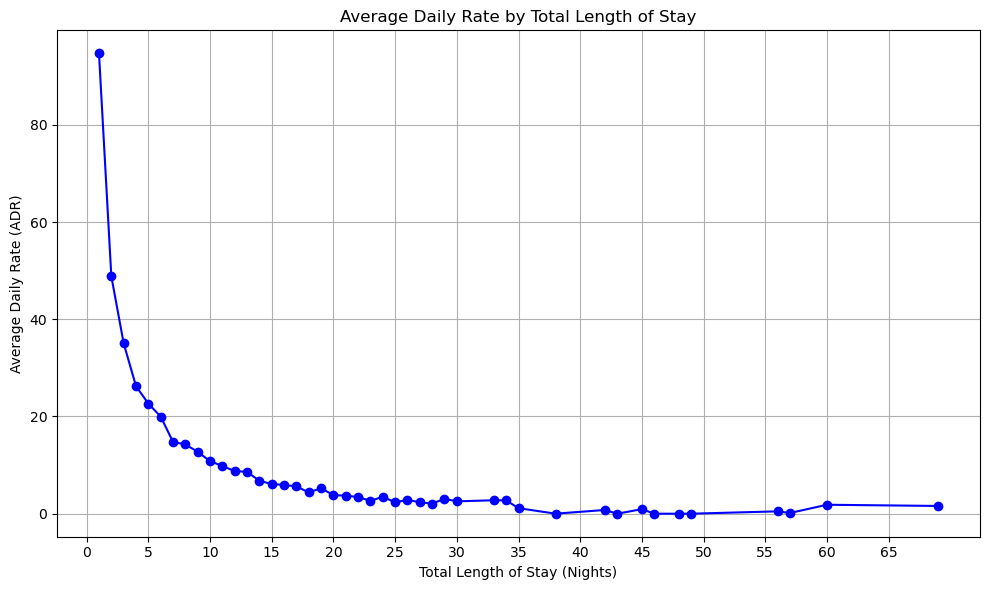

In [16]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Group by total length of stay and calculate average ADR
avg_adr_by_stay = df.groupby('total_stay')['adr'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_adr_by_stay.index, avg_adr_by_stay.values, marker='o', linestyle='-', color='b')
plt.title('Average Daily Rate by Total Length of Stay')
plt.xlabel('Total Length of Stay (Nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.xticks(range(0, max(avg_adr_by_stay.index)+1, 5))
plt.tight_layout()
plt.show()

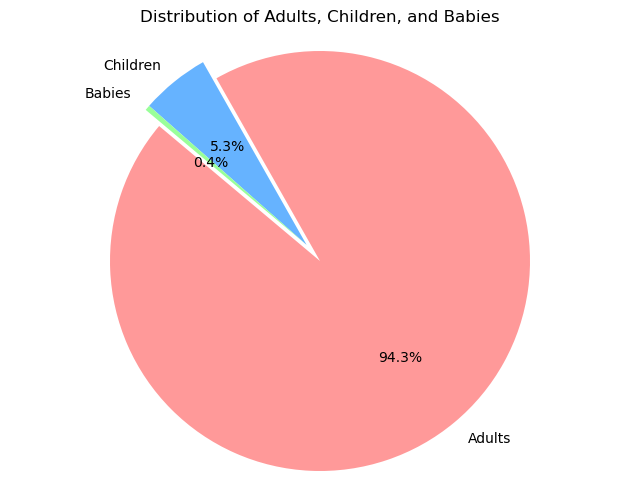

In [18]:

total_adults = df['adults'].sum()
total_children = df['children'].sum()
total_babies = df['babies'].sum()

# Plotting
labels = ['Adults', 'Children', 'Babies']
sizes = [total_adults, total_children, total_babies]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Adults, Children, and Babies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



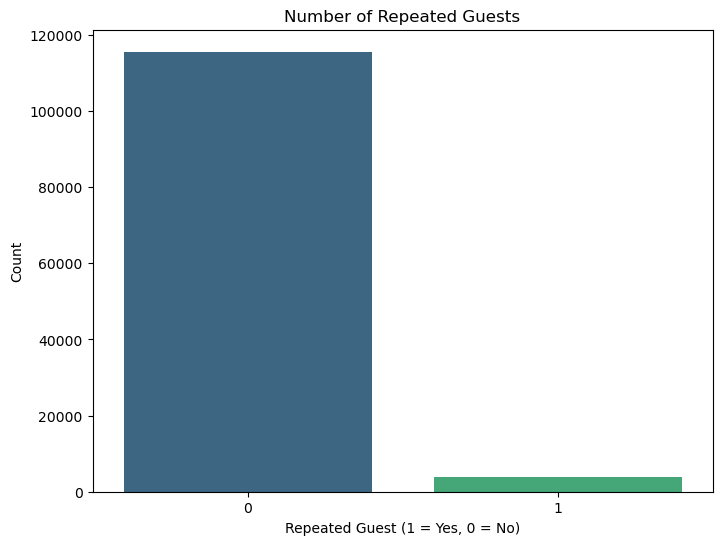

In [20]:
import seaborn as sns

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_repeated_guest', palette='viridis')
plt.title('Number of Repeated Guests')
plt.xlabel('Repeated Guest (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


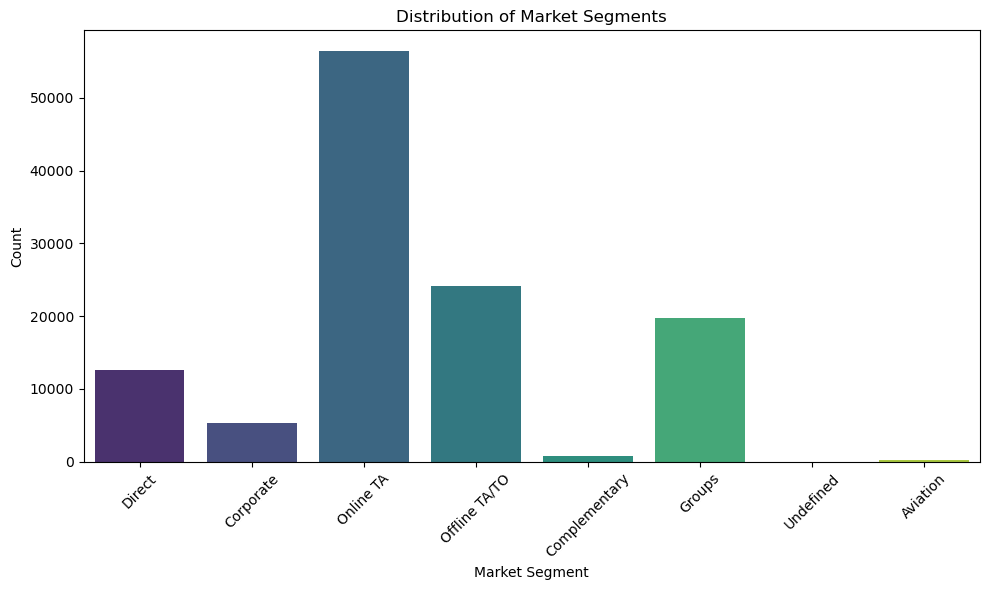

In [27]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='market_segment', palette='viridis')
plt.title('Distribution of Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

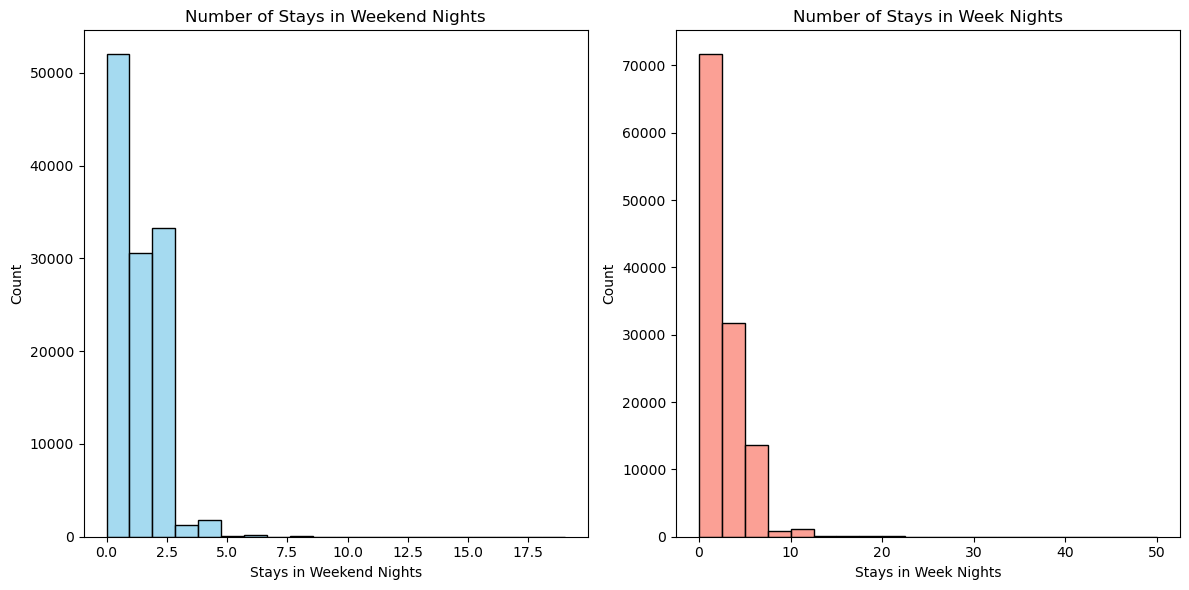

In [22]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['stays_in_weekend_nights'], bins=20, kde=False, color='skyblue')
plt.title('Number of Stays in Weekend Nights')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['stays_in_week_nights'], bins=20, kde=False, color='salmon')
plt.title('Number of Stays in Week Nights')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


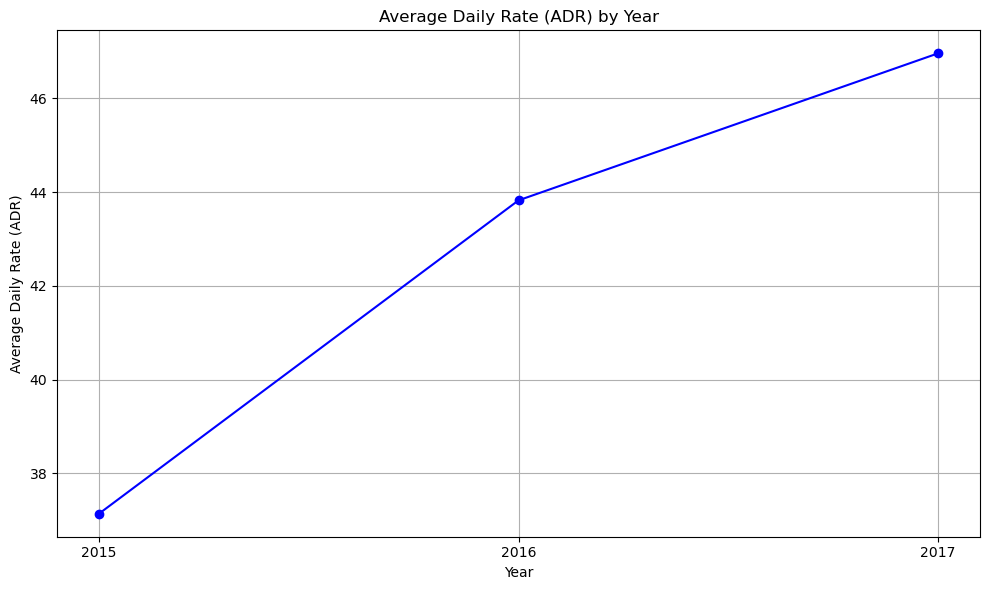

In [28]:
adr_by_year = df.groupby('arrival_date_year')['adr'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(adr_by_year.index, adr_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Daily Rate (ADR) by Year')
plt.xlabel('Year')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.xticks(adr_by_year.index)
plt.tight_layout()
plt.show()